<a href="https://colab.research.google.com/github/astrodatos/proyecto_iluminatiuwu/blob/master/Algoritmo_(beta).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from astropy import units as u
from astropy.coordinates import SkyCoord

!pip install astroquery #esto para instalar astroquery
from astroquery.gaia import Gaia 

     |████████████████████████████████| 4.2MB 9.0MB/s 
     |████████████████████████████████| 2.3MB 44.5MB/s 
     |████████████████████████████████| 61kB 19.7MB/s 
     |████████████████████████████████| 102kB 28.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/8a/d1/1e/4124d9ef35e2bbfbaa284c97dd49d9babbab42d966c4bea190
Successfully built astroquery
Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
"""
job = Gaia.launch_job_async("select top 100000 \
solution_id,random_index,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,teff_val,lum_val \
from gaiadr2.gaia_source order by random_index") #obtenemos los datos de 1000000 estrellas con los anteriores atributos en un Asynchronous query

print(job) 
r = job.get_results()
print(r)
"""

'\njob = Gaia.launch_job_async("select top 100000 solution_id,random_index,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,teff_val,lum_val from gaiadr2.gaia_source order by random_index") #obtenemos los datos de 1000000 estrellas con los anteriores atributos en un Asynchronous query\n\nprint(job) \nr = job.get_results()\nprint(r)\n'

In [3]:
"""
jobpd=r.to_pandas() #convertimos el job a pandas
jobpd[:10] #vemos las primeras 10 filas para ver que todo está bien
"""

'\njobpd=r.to_pandas() #convertimos el job a pandas\njobpd[:10] #vemos las primeras 10 filas para ver que todo está bien\n'

In [4]:
"""
pd.Series.count(jobpd.iloc[:,11]) #con esto obtenemos el número de estrellas que poseen info de teff_val
datamask = np.logical_not(np.isnan(jobpd.iloc[:,11]))

filtdata=jobpd.loc[datamask]

filtdata['class'] = 'A' #esto se arregla en la celda de abajo

filtdata
"""

"\npd.Series.count(jobpd.iloc[:,11]) #con esto obtenemos el número de estrellas que poseen info de teff_val\ndatamask = np.logical_not(np.isnan(jobpd.iloc[:,11]))\n\nfiltdata=jobpd.loc[datamask]\n\nfiltdata['class'] = 'A' #esto se arregla en la celda de abajo\n\nfiltdata\n"

In [5]:
""""
maskO = (filtdata["teff_val"]>=33000)
filtdata.loc[maskO,'class'] = 'O'
maskB = (filtdata["teff_val"]>=10000) & (filtdata["teff_val"]<33000)
filtdata.loc[maskB,'class'] = 'B'
maskA = (filtdata["teff_val"]>=7500) & (filtdata["teff_val"]<10000)
filtdata.loc[maskA,'class'] = 'A'
maskF = (filtdata["teff_val"]>=6000) & (filtdata["teff_val"]<7500)
filtdata.loc[maskF,'class'] = 'F'
maskG = (filtdata["teff_val"]>=5200) & (filtdata["teff_val"]<6000)
filtdata.loc[maskG,'class'] = 'G'
maskK = (filtdata["teff_val"]>=3700) & (filtdata["teff_val"]<5200)
filtdata.loc[maskK,'class'] = 'K'
maskM = (filtdata["teff_val"]<3700)
filtdata.loc[maskM,'class'] = 'M'

filtdata
"""

'"\nmaskO = (filtdata["teff_val"]>=33000)\nfiltdata.loc[maskO,\'class\'] = \'O\'\nmaskB = (filtdata["teff_val"]>=10000) & (filtdata["teff_val"]<33000)\nfiltdata.loc[maskB,\'class\'] = \'B\'\nmaskA = (filtdata["teff_val"]>=7500) & (filtdata["teff_val"]<10000)\nfiltdata.loc[maskA,\'class\'] = \'A\'\nmaskF = (filtdata["teff_val"]>=6000) & (filtdata["teff_val"]<7500)\nfiltdata.loc[maskF,\'class\'] = \'F\'\nmaskG = (filtdata["teff_val"]>=5200) & (filtdata["teff_val"]<6000)\nfiltdata.loc[maskG,\'class\'] = \'G\'\nmaskK = (filtdata["teff_val"]>=3700) & (filtdata["teff_val"]<5200)\nfiltdata.loc[maskK,\'class\'] = \'K\'\nmaskM = (filtdata["teff_val"]<3700)\nfiltdata.loc[maskM,\'class\'] = \'M\'\n\nfiltdata\n'

In [6]:
"""
filtdata.to_csv("tabla_temperatura_100mil.csv")
"""

'\nfiltdata.to_csv("tabla_temperatura_100mil.csv")\n'

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


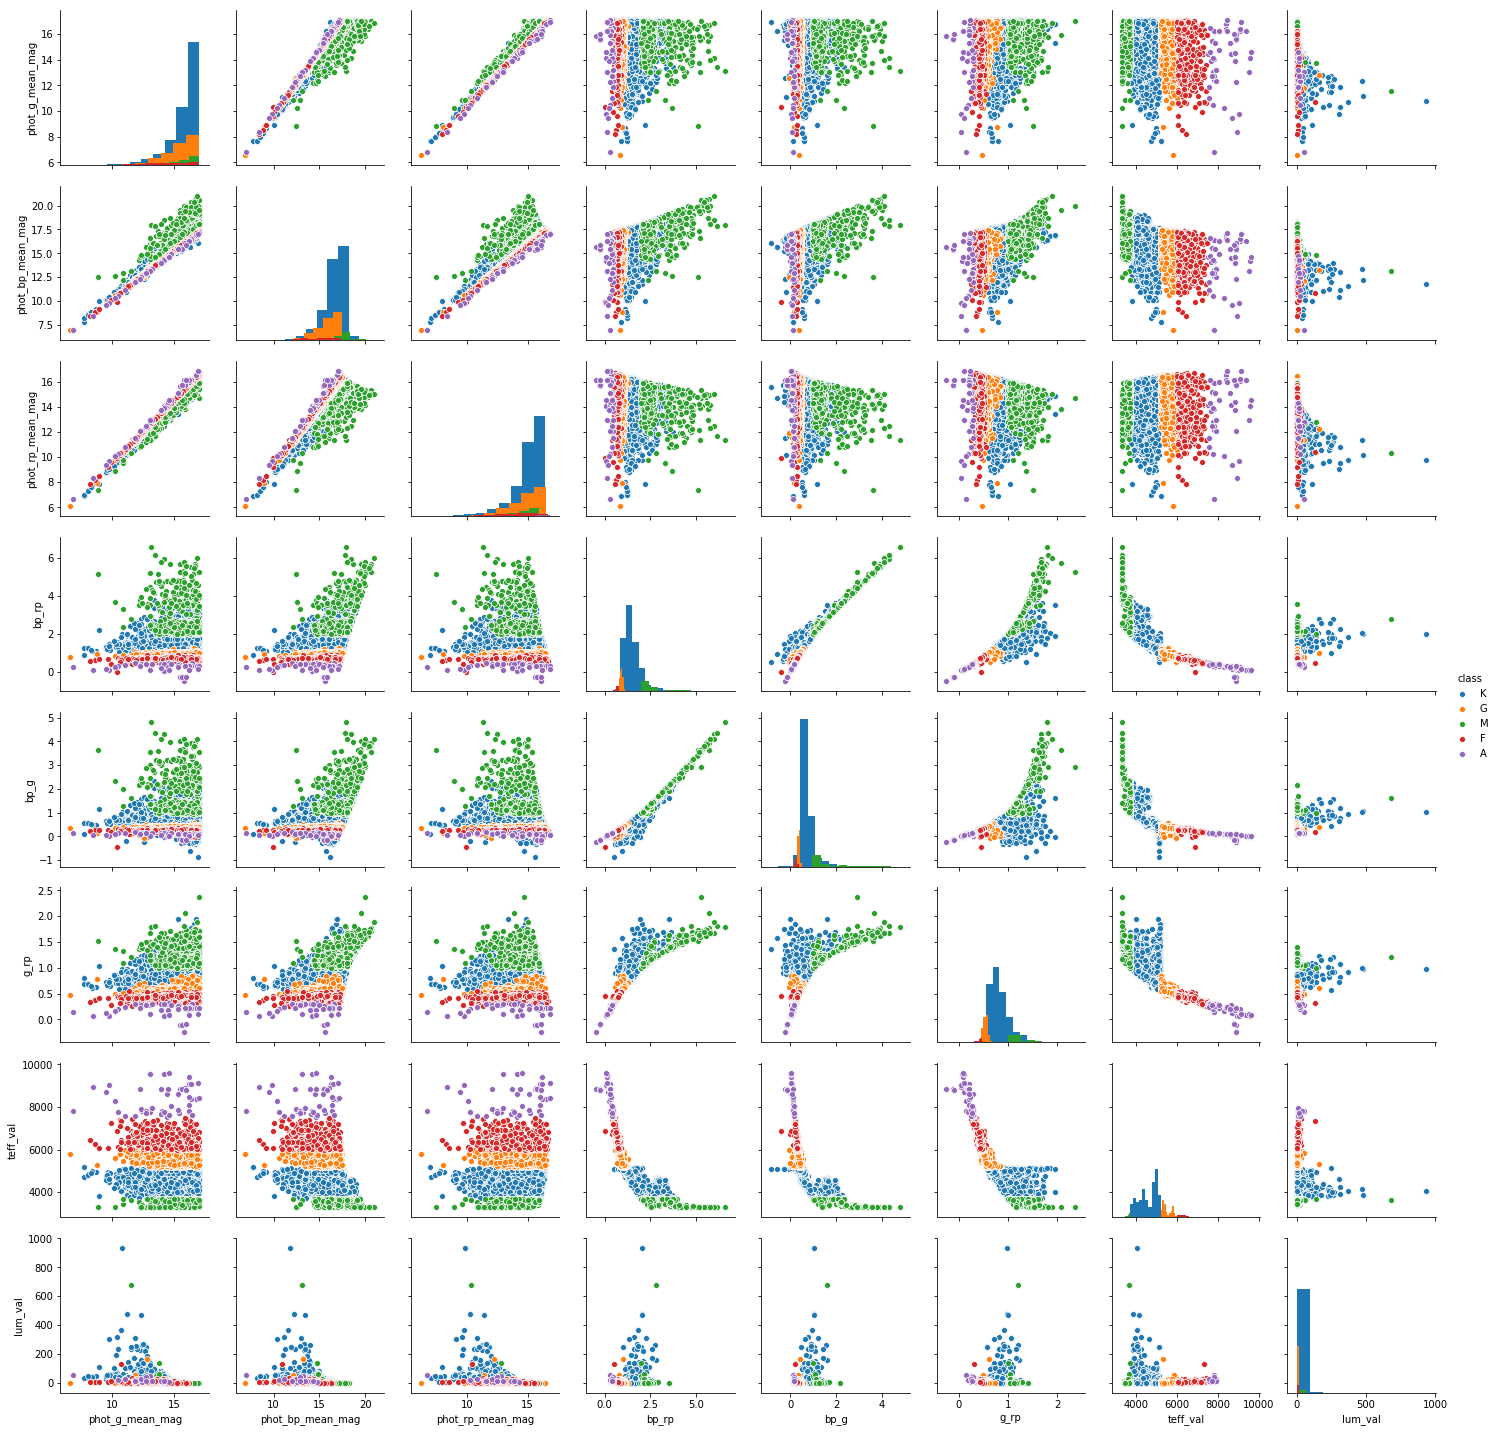

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets 
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  

data10=pd.read_csv("https://raw.githubusercontent.com/astrodatos/proyecto_iluminatiuwu/master/tabla_temperatura_y_tipo_espectral(10mil).csv")

atributos=['phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','bp_rp','bp_g','g_rp','teff_val','lum_val']
sns.pairplot(data10, hue = 'class', vars=atributos, diag_kind = 'hist')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


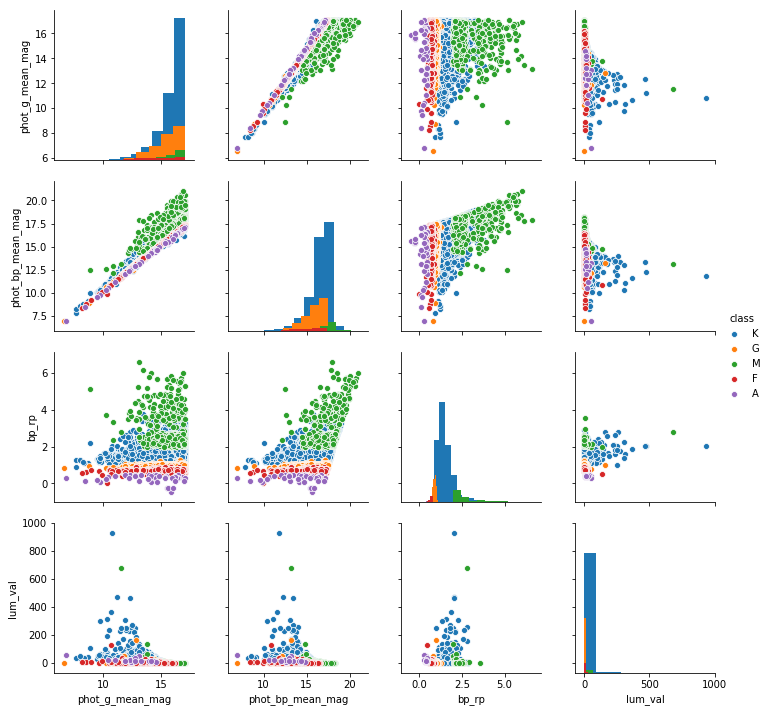

In [8]:
#Relaciones interesantes 
sns.pairplot(data10[['phot_g_mean_mag', 'phot_bp_mean_mag','bp_rp', 'lum_val', 'class']], hue = 'class',diag_kind = 'hist')

In [0]:
#clases = data10['class'].unique() 
#mapa = {}
#for clase, i in enumerate(clases):
    #mapa[i] = clase
#clases
#mapa #No salen las clases O y B en clases ni en mapa por alguna 
#extraña razón, por lo que tendremos que hacerlo a mano


clases = np.array(['O','B','A','F','G','K','M'], dtype=object)
mapa={'O':0,'B':1,'A':2,'F':3,'G':4,'K':5,'M':6}

#data10
phot_g_mean_mag=data10.iloc[:,6]
phot_bp_mean_mag=data10.iloc[:,7]
phot_rp_mean_mag=data10.iloc[:,8]
bp_rp=data10.iloc[:,9]
bp_g=data10.iloc[:,10]
g_rp=data10.iloc[:,11]
teff_val=data10.iloc[:,12]
lum_val=data10.iloc[:,13]



In [12]:
from sklearn.model_selection import train_test_split

X = np.array(data10.iloc[:,:-1])
y = np.array(data10['class'].map(mapa))

rs = 1851

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = rs)

#Lo de abajo es solo para probar si funciona Kneighbors, ya que solo bastaba 
#copiar y pegar parte del código de la actividad 5

#Cabe destacar que no usaremos este algoritmo, solo 
#utilizaremos svm y random forest

from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier(n_neighbors=25) #25 vecinos
# Entrenamos el clasificador utilizando los atributos y clases (respectivamente)
#esperadas de acuerdo al conjunto de entrenamiento
knn_clf.fit(train_X, train_y) 



#La linea superior tira error debido a los NaN de lum_val. Si es que
#este error se repite al hacer svm y random forest en el futuro, hay que
#cambiar data10 eliminando esta columna o hacer que ignore los NaN.

ValueError: ignored